# CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. 
Car price prediction is one of the major research areas in machine learning.

Author: Tejasvi

# PREDICTING PRICE OF PRE-OWNED CARS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Setting dimensions for plot 

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Reading CSV file

In [8]:
path=('C:\\Users\\water place pharmacy\\Desktop\\oasis\\')

In [9]:
cars_data=pd.read_csv(path+"CarPrice.csv")

# Creating copy

In [10]:
cars=cars_data.copy()

# Structure of the dataset

In [11]:
 cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000


# Summarizing data

In [12]:

cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cars.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,59.323,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,1.000,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,52.000,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,103.000,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,154.000,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
max,205.000,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


In [13]:
# To display maximum set of columns
pd.set_option('display.max_columns', 500)
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,59.323,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,1.000,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,52.000,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,103.000,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,154.000,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
max,205.000,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


# Removing duplicate records

In [17]:
cars.drop_duplicates(keep='first',inplace=True)

# Data cleaning

In [18]:
#number of missing values in each column
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

C:\Users\water place pharmacy\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0

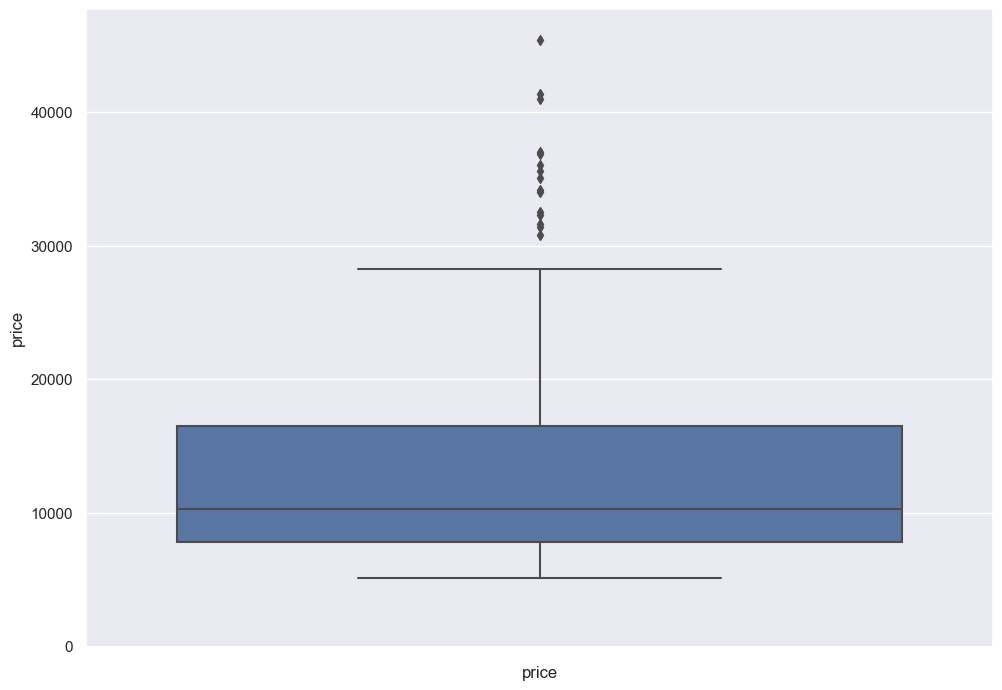

In [20]:
# Variable price
price_count=cars['price'].value_counts().sort_index()
sns.distplot(cars['price'])
cars['price'].describe()
sns.boxplot(y=cars['price'])
sum(cars['price'] > 150000)
sum(cars['price'] < 100)
# Working range- 100 and 150000

C:\Users\water place pharmacy\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0

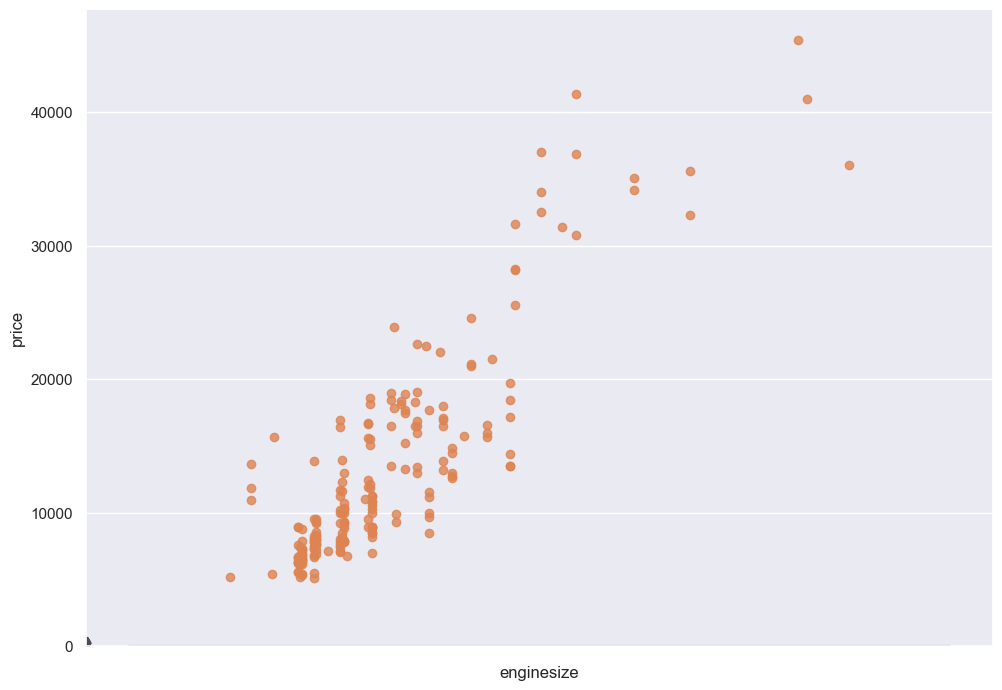

In [23]:
# Variable powerPS
power_count=cars['enginesize'].value_counts().sort_index()
sns.distplot(cars['enginesize'])

cars['enginesize'].describe()
sns.boxplot(y=cars['enginesize'])
sns.regplot(x='enginesize', y='price', scatter=True, 
            fit_reg=False, data=cars)
sum(cars['enginesize'] > 500)
sum(cars['enginesize'] < 10)
# Working range- 10 and 500

# Visualizing

C:\Users\water place pharmacy\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='price'>

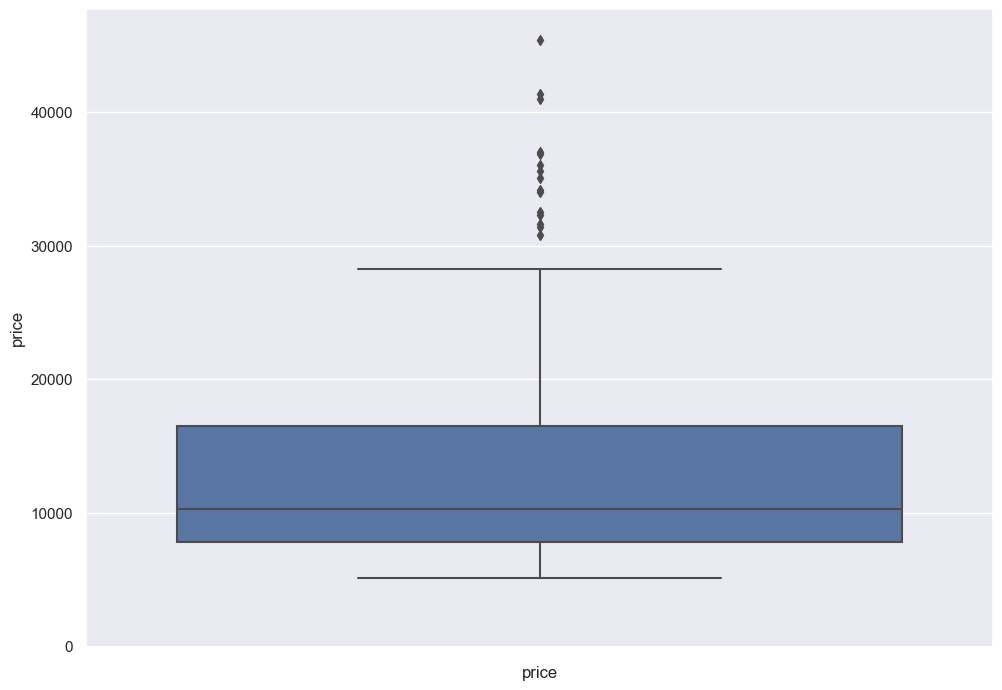

In [24]:
sns.distplot(cars['price'])
sns.boxplot(y=cars['price'])


# Age vs price

<AxesSubplot:xlabel='horsepower', ylabel='price'>

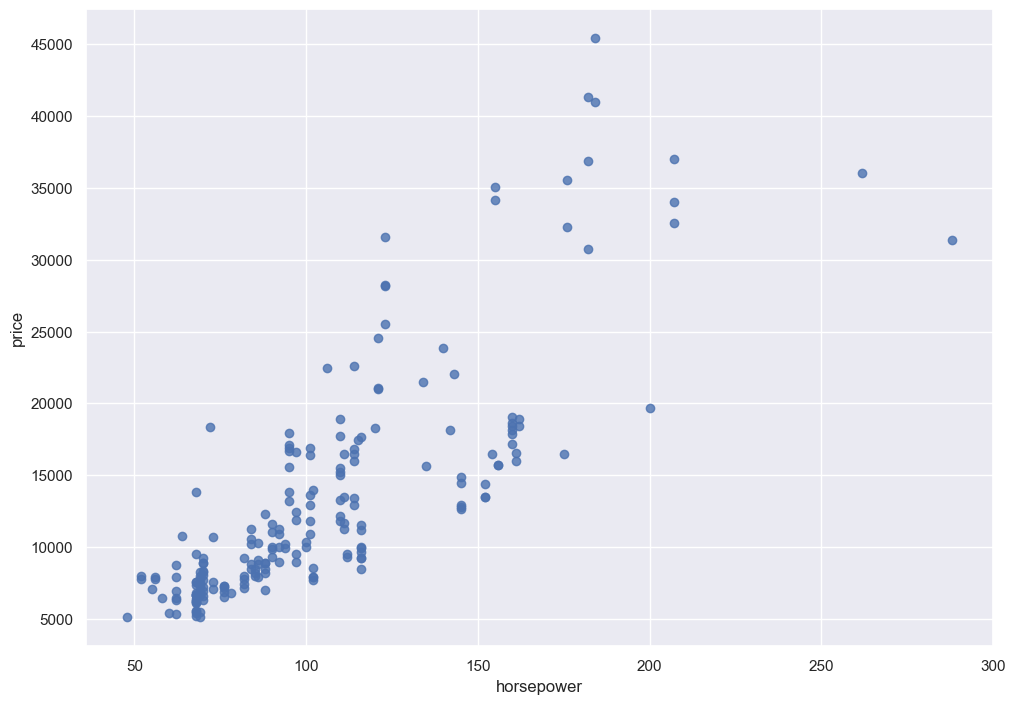

In [26]:
sns.regplot(x='horsepower',y='price',scatter=True,
           fit_reg=False,data=cars)

<AxesSubplot:xlabel='carbody', ylabel='price'>

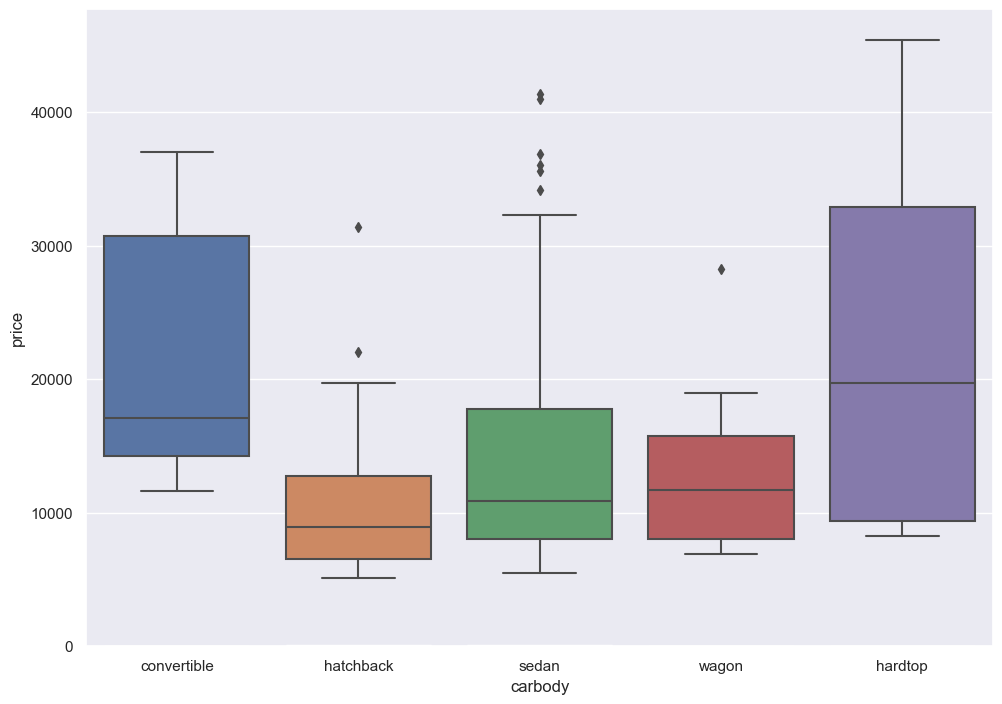

In [31]:
# Variable carbody
cars['carbody'].value_counts()
pd.crosstab(cars['carbody'],columns='count',normalize=True)
sns.countplot(x= 'carbody',data=cars)
sns.boxplot(x= 'carbody',y='price',data=cars)

# carbody affects price 

<AxesSubplot:xlabel='fueltype', ylabel='price'>

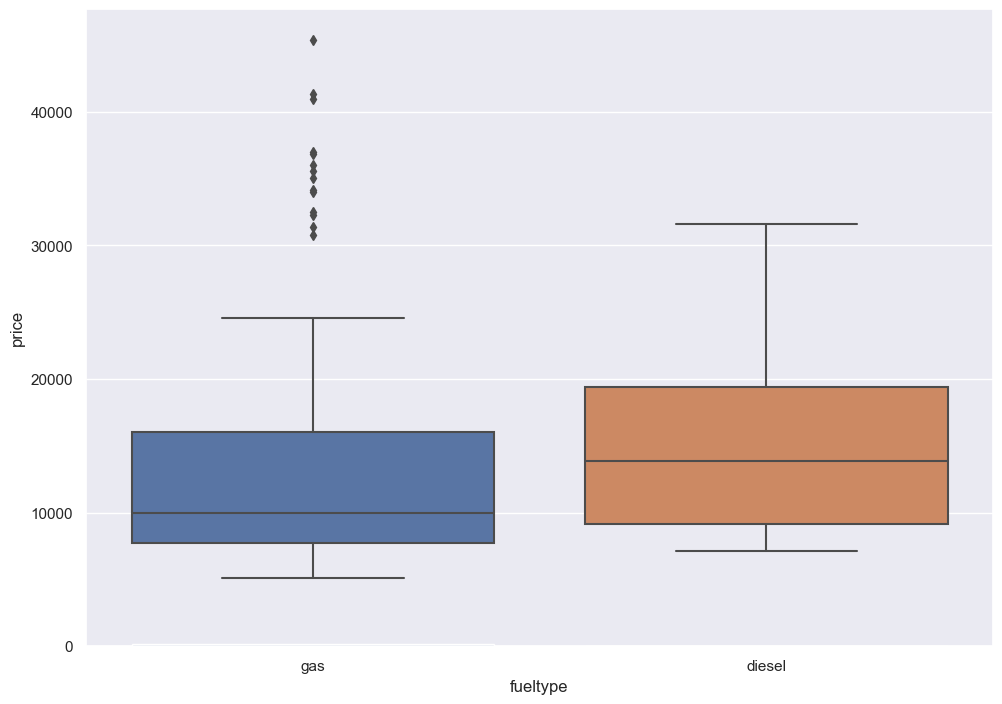

In [32]:
# Variable fueltype
cars['fueltype'].value_counts()
pd.crosstab(cars['fueltype'],columns='count',normalize=True)
sns.countplot(x= 'fueltype',data=cars)
sns.boxplot(x= 'fueltype',y='price',data=cars)
# fueltype affects price 

<AxesSubplot:xlabel='CarName', ylabel='price'>

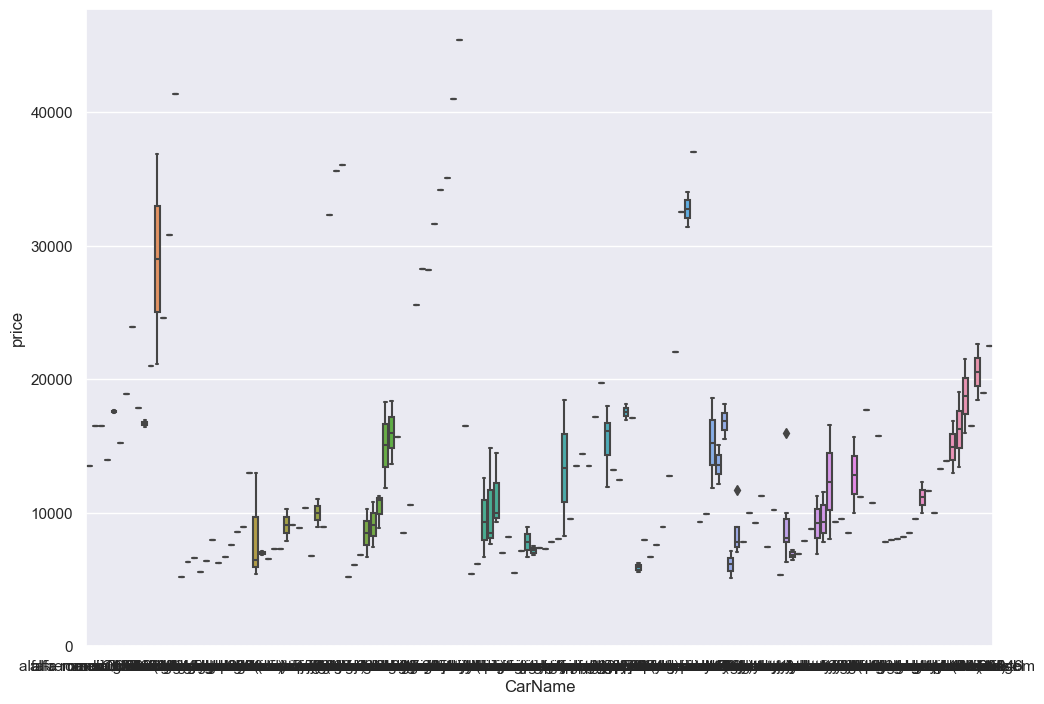

In [36]:
# Variable CarName
cars['CarName'].value_counts()
pd.crosstab(cars['CarName'],columns='count',normalize=True)
sns.countplot(x= 'CarName',data=cars)
sns.boxplot(x= 'CarName',y='price',data=cars)


# Correlation

In [38]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)   
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]         

enginesize         0.874
curbweight         0.835
horsepower         0.808
carwidth           0.759
highwaympg         0.698
citympg            0.686
carlength          0.683
wheelbase          0.578
boreratio          0.553
carheight          0.119
car_ID             0.109
peakrpm            0.085
symboling          0.080
stroke             0.079
compressionratio   0.068
Name: price, dtype: float64


# OMITTING MISSING VALUES

In [39]:
cars_omit=cars.dropna(axis=0)

In [40]:
# Converting categorical variables to dummy variables
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

# IMPORTING NECESSARY LIBRARIES

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# MODEL BUILDING WITH OMITTED DATA

(143, 190) (62, 190) (143,) (62,)


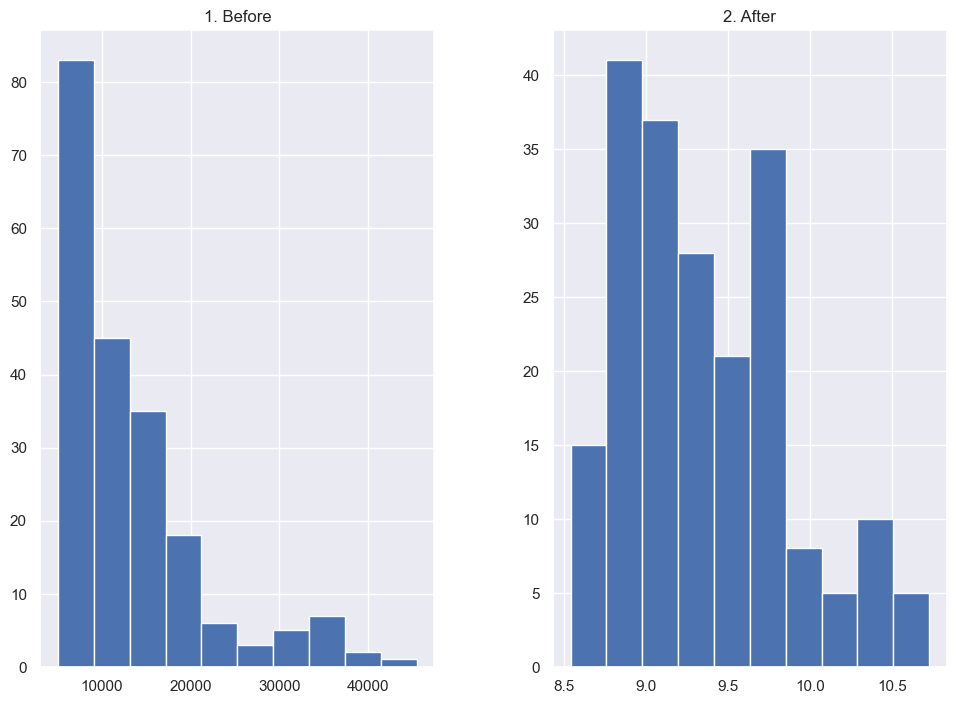

In [42]:
# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']

# Plotting the variable price
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

# Transforming price as a logarithmic value
y1 = np.log(y1)

# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# BASELINE MODEL FOR OMITTED DATA

We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model

In [53]:
# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)


9.400709970120042


In [54]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [55]:
# finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
                               
print(base_root_mean_square_error)

0.5298446094909218


#  LINEAR REGRESSION WITH OMITTED DATA

In [56]:

# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)

In [57]:
# Model
model_lin1=lgr.fit(X_train,y_train)

In [58]:
# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

In [59]:
# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5840957604075424


In [60]:
# R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

-0.21526521574719815 0.9997603802697455


count   62.000
mean     0.077
std      0.584
min     -1.061
25%     -0.314
50%      0.063
75%      0.406
max      1.791
Name: price, dtype: float64

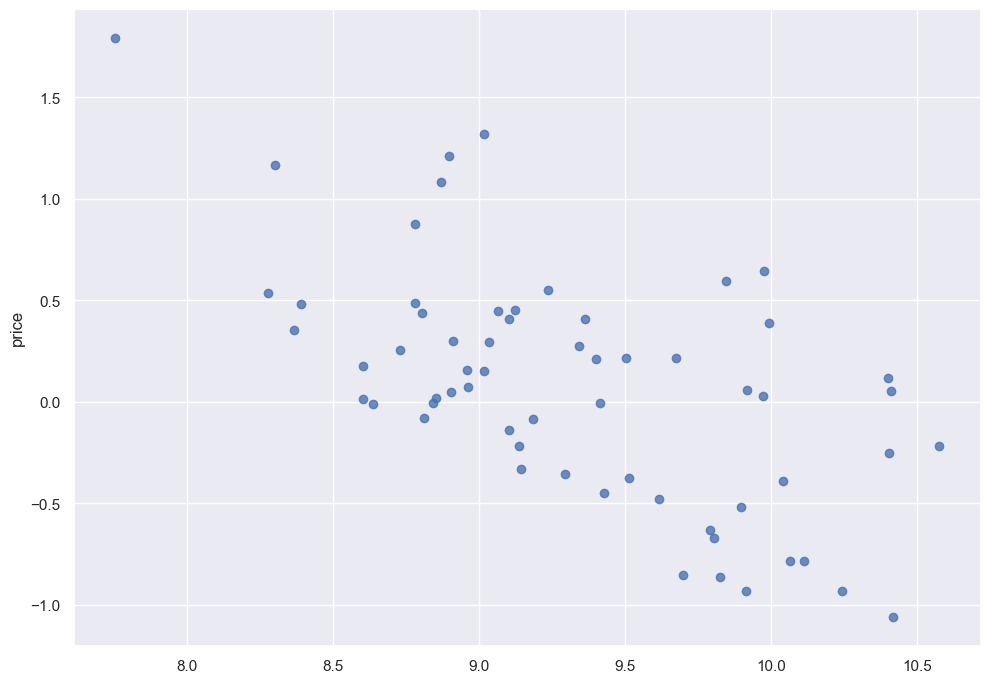

In [61]:
# Regression diagnostics- Residual plot analysis
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=False)
residuals1.describe()



# RANDOM FOREST WITH OMITTED DATA

In [62]:
# Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [63]:
# Model
model_rf1=rf.fit(X_train,y_train)

In [64]:
# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)

In [65]:
# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)


0.1571926387108731


In [66]:
# R squared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)   

0.9119828366203602 0.9554743773372119


#  MODEL BUILDING WITH IMPUTED DATA

In [69]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True) 

# MODEL BUILDING WITH OMITTED DATA


(143, 190) (62, 190) (143,) (62,)


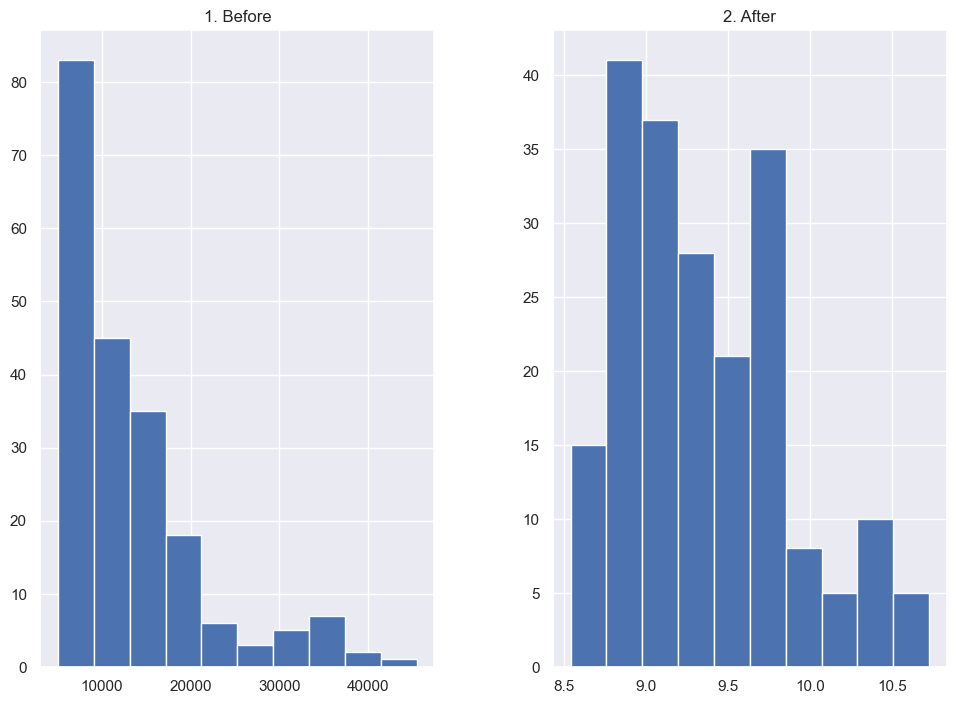

In [70]:
# Separating input and output feature
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']


# Plotting the variable price
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

# Transforming price as a logarithmic value
y2 = np.log(y2)

# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

# ================
# BASELINE MODEL FOR IMPUTED DATA

We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model


In [71]:
# finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))

# finding the RMSE
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
                               
print(base_root_mean_square_error_imputed)

9.400709970120042
0.5298446094909218


# LINEAR REGRESSION WITH IMPUTED DATA

In [72]:
# Setting intercept as true
lgr2=LinearRegression(fit_intercept=True)

# Model
model_lin2=lgr2.fit(X_train1,y_train1)

# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)

# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

# R squared value
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.5840957604075424
-0.21526521574719815 0.9997603802697455


# RANDOM FOREST WITH IMPUTED DATA


In [73]:

# Model parameters
rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

# Model
model_rf2=rf2.fit(X_train1,y_train1)

# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)

# Computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

# R squared value
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)     

0.1571926387108731
0.9119828366203602 0.9554743773372119


In [74]:
print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)


Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.9997603802697455
R squared value for test from Linear Regression=  -0.21526521574719815
R squared value for train from Random Forest=  0.9554743773372119
R squared value for test from Random Forest=  0.9119828366203602
Base RMSE of model built from data where missing values were omitted= 0.5298446094909218
RMSE value for test from Linear Regression=  0.5840957604075424
RMSE value for test from Random Forest=  0.1571926387108731



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.9997603802697455
R squared value for test from Linear Regression=  -0.21526521574719815
R squared value for train from Random Forest=  0.9554743773372119
R squared value for test from Random Forest=  0.9119828366203602
Base RMSE of model built from data where missing values were imputed= 0.5298446094909218
RMSE value fo